<a href="https://colab.research.google.com/github/Semiarty/github-upload/blob/master/111_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv'
df1 = pd.read_csv(url)

In [3]:
df1.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [5]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv -O nbaallelo.csv

--2020-12-06 12:08:40--  https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18173265 (17M) [text/plain]
Saving to: ‘nbaallelo.csv’

nbaallelo.csv       100%[===================>]  17.33M  96.8MB/s    in 0.2s    

2020-12-06 12:08:40 (96.8 MB/s) - ‘nbaallelo.csv’ saved [18173265/18173265]



In [6]:
df2 = pd.read_csv('nbaallelo.csv')

In [8]:
df1.equals(df2)

True

In [10]:
df1.head().T

,0,1,2,3,4
gameorder,1,1,2,2,3
game_id,194611010TRH,194611010TRH,194611020CHS,194611020CHS,194611020DTF
lg_id,NBA,NBA,NBA,NBA,NBA
_iscopy,0,1,0,1,0
year_id,1947,1947,1947,1947,1947
date_game,11/1/1946,11/1/1946,11/2/1946,11/2/1946,11/2/1946
seasongame,1,1,1,2,1
is_playoffs,0,0,0,0,0
team_id,TRH,NYK,CHS,NYK,DTF
fran_id,Huskies,Knicks,Stags,Knicks,Falcons


In [28]:
avg_pts = df1.pts.mean()
median_pts = df1.pts.median()
min_pts = df1.pts.min()
max_pts = df1.pts.max()

In [23]:
quantiles = []
for i in range(0,100,5):
  quantiles.append(df1.pts.quantile(i/100))

In [24]:
quantiles

[0.0,
 79.0,
 84.0,
 88.0,
 91.0,
 93.0,
 95.0,
 97.0,
 99.0,
 101.0,
 103.0,
 104.0,
 106.0,
 108.0,
 110.0,
 112.0,
 115.0,
 118.0,
 122.0,
 127.0]

In [27]:
import numpy as np

assert round(avg_pts, 1) == 102.7
assert round(median_pts, 1) == 103
np.testing.assert_array_almost_equal(quantiles,  
  [0.0,
  79.0,
  84.0,
  88.0,
  91.0,
  93.0,
  95.0,
  97.0,
  99.0,
  101.0,
  103.0,
  104.0,
  106.0,
  108.0,
  110.0,
  112.0,
  115.0,
  118.0,
  122.0,
  127.0])
assert round(max_pts, 2) == 186
assert round(min_pts, 2) == 0

In [95]:
team_mean = df1.groupby('fran_id').mean()


In [96]:
five_best_teams = team_mean.sort_values(by='pts',axis=0, ascending=False).head(5)

In [97]:
five_best_teams

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
fran_id,,,,,,,,,,,,,
Condors,10244.316279,0.520930,1969.955814,43.572093,0.051163,115.446512,1349.743103,1349.218208,38.071956,117.500000,1381.226312,1381.751207,0.458771
Squires,12655.145181,0.515645,1971.973717,45.073842,0.070088,114.051314,1395.131442,1394.786272,38.316256,116.110138,1432.313195,1432.658364,0.456003
Floridians,10306.715909,0.502273,1970.000000,44.527273,0.072727,112.654545,1354.030234,1353.768365,38.354782,113.702273,1382.276611,1382.538479,0.464918
Stars,12351.167989,0.496032,1971.711640,46.395503,0.105820,112.354497,1457.255206,1457.330003,44.709839,111.007937,1427.488422,1427.413627,0.536724
Colonels,12835.747045,0.490544,1972.095745,47.750591,0.120567,111.625296,1494.059687,1494.341934,47.811544,108.704492,1426.676219,1426.393972,0.581424


In [70]:
np.testing.assert_array_almost_equal(five_best_teams['pts'].values, [115.44651163, 114.05131414, 112.65454545, 112.35449735, 111.62529551])

In [55]:
In [1]: import matplotlib.pyplot as plt

In [2]: plt.close('all')

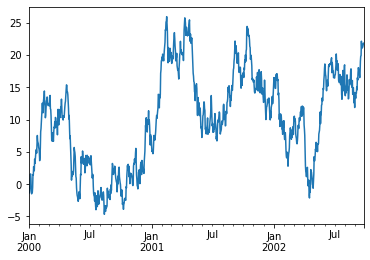

In [56]:
In [3]: ts = pd.Series(np.random.randn(1000),
   ...:                index=pd.date_range('1/1/2000', periods=1000))
   ...: 

In [4]: ts = ts.cumsum()

In [5]: ts.plot()

<Figure size 432x288 with 0 Axes>

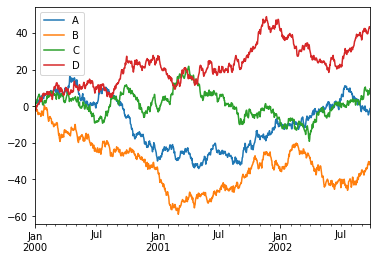

In [57]:
In [6]: df = pd.DataFrame(np.random.randn(1000, 4),
   ...:                   index=ts.index, columns=list('ABCD'))
   ...: 

In [7]: df = df.cumsum()

In [8]: plt.figure();

In [9]: df.plot();

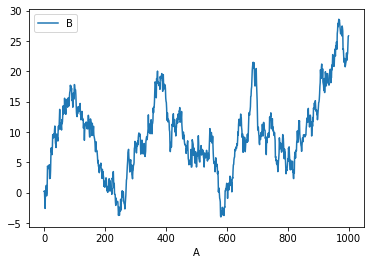

In [58]:
In [10]: df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

In [11]: df3['A'] = pd.Series(list(range(len(df))))

In [12]: df3.plot(x='A', y='B')

In [79]:
five_worst_teams = team_mean.sort_values(by = 'pts', axis=0, ascending=True).head(5)

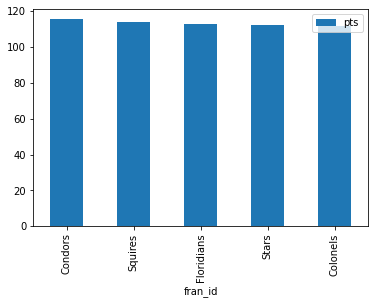

In [80]:
plt.figure();

five_best_teams['pts'].plot(kind='bar', legend=True);


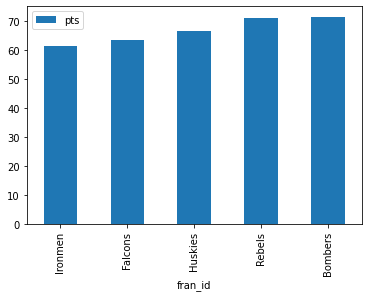

In [81]:
plt.figure();

five_worst_teams['pts'].plot(kind='bar', legend=True);

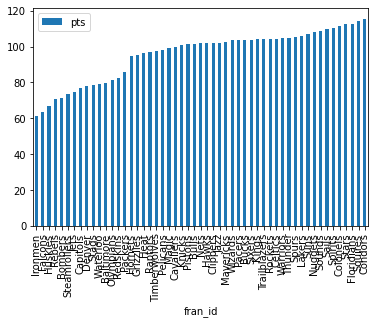

In [85]:

plt.figure();
team_mean['pts'].sort_values(ascending=True).plot(kind='bar', legend=True);

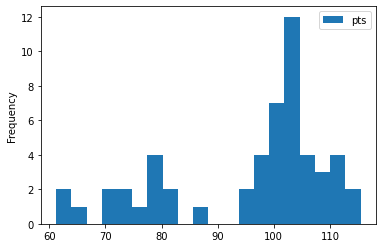

In [88]:
plt.figure();
team_mean['pts'].plot(kind='hist', bins = 20, legend=True)

In [122]:
yearly_wins = df1.groupby(by = ['fran_id', 'year_id'])['game_result'].count().reset_index()

<Figure size 432x288 with 0 Axes>

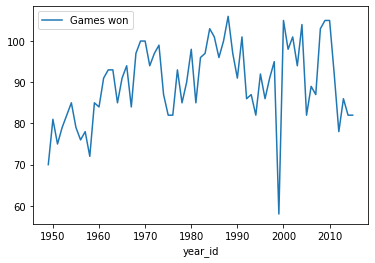

In [123]:
plt.figure();
yearly_wins.rename(columns = {'game_result' : 'Games won'},inplace = True)
yearly_wins.loc[yearly_wins['fran_id'] == 'Lakers'].plot.line(x = 'year_id', y='Games won')

# US Births exercise

In [124]:
url2 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv'

In [125]:
us_births = pd.read_csv(url2)

In [126]:
us_births.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


How does the month impact childbirth?

In [128]:
monthly_rates = us_births.groupby('month')['births'].sum()

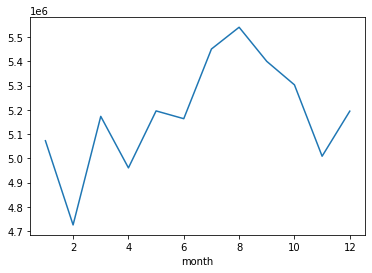

In [164]:
plt.figure();
monthly_rates.plot.line()

It is evident that there's an increase in births during the Q3, meaning that a lot of children are conceived during the Q4 period. Possible explanations could be the cooler weather (more time spent at home), family holidays (thanksgiving, christmas). 

Have there been any significants ups / downs in chilbirth throughout the years? Could you explain them?

In [131]:
yearly_rates = us_births.groupby('year')['births'].sum()

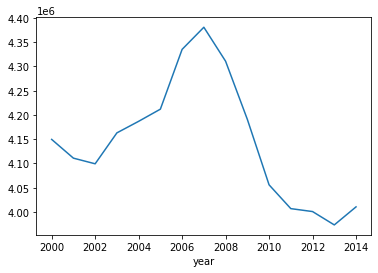

In [132]:
plt.figure();
yearly_rates.plot.line()

There was a steady and continuous increase in birth rates up to the economical crisis of 2008, which, understandably, resulted in cost-cutting, less income and etc.

Which days of the week children are born most frequently on?

In [160]:
week_day_rates = us_births.groupby('day_of_week')['births'].sum()
week_day_rates

day_of_week
1     9316001
2    10274874
3    10109130
4    10045436
5     9850199
6     6704495
7     5886889
Name: births, dtype: int64

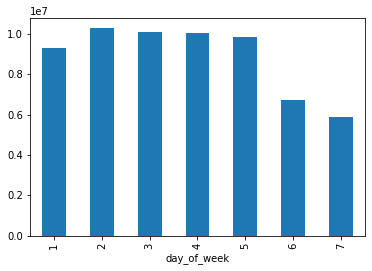

In [165]:
plt.figure();
week_day_rates.plot.bar()

Children are mostly born during the weekdays, tuesday and wednesday being the most common days.

What's the lowest/biggest amount of childbirths per month?

In [148]:
monthly_minmax = us_births.groupby('month').agg({'births' : ['min', 'max']})
monthly_minmax

births       
         min    max
month              
1       6540  13960
2       6707  14207
3       6497  13844
4       6545  13729
5       6609  14569
6       6963  14395
7       7279  15007
8       7352  15374
9       7399  16081
10      6870  14550
11      6864  14835
12      5728  15645

Which months are most / least predictable in terms of childbirth? (hint - use standard deviation)

In [159]:
monthly_std = us_births.groupby('month')['births'].std()
monthly_std

month
1     2166.016841
2     2153.713646
3     2174.596904
4     2203.383134
5     2333.335522
6     2255.685813
7     2358.034529
8     2299.771394
9     2456.548637
10    2218.436895
11    2413.190333
12    2553.815885
Name: births, dtype: float64

Months with the largest standard deviations are the least predictable, i.e. 9, 11 and 12.